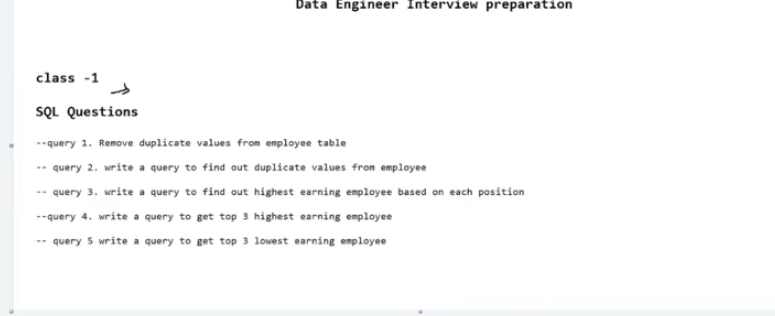

# question 1 to 5

In [ ]:
--- practice questions and answers

CREATE TABLE Employee2 (
    employee_id INT ,
    employee_name VARCHAR(50),
    department_id INT,
    position VARCHAR(50),
    salary DECIMAL(10, 2)
);


INSERT INTO Employee2 (employee_id, employee_name, department_id, position, salary)
VALUES 
(1, 'Alice Johnson', 101, 'Software Engineer', 70000),
(2, 'Bob Smith', 102, 'Data Scientist', 80000),
(3, 'Carol White', 103, 'Project Manager', 75000),
(4, 'David Brown', 104, 'Quality Assurance', 60000),
(5, 'Eva Green', 105, 'HR Specialist', 55000),
(6, 'Frank Martin', 101, 'Software Engineer', 70000),
(3, 'Carol White', 103, 'Project Manager', 75000),
(4, 'David Brown', 104, 'Quality Assurance', 60000)

select * from employee2

-- 1. remove duplicate values from empl table
select distinct * from Employee2;

-- 2. write a query to find out duplicate values from employee
with cte2 as(
    select *,row_number() over(partition by employee_id order by employee_id) as rn
from Employee2
)

select * from cte2 where rn =2;

-- 3. write a query to find out highest earning employee based 
-- on each position
select * from employee2;

with cte1 as(
select *, row_number() over(partition by position 
order by salary desc) as d_rnk from Employee2)
select * from cte1 where d_rnk = 1
order by employee_id;

select max(salary),position from Employee2
group by position;

-- 4. top 3 hihest earning employee
select  distinct top 3 * from Employee2 
order by salary desc

-- 5.query to get top 3 lowest earning employee
select  distinct top 3 * from Employee2 
order by salary asc;


In [ ]:
CREATE TABLE Emp (
    employee_id INT PRIMARY KEY,
    employee_name VARCHAR(50),
    department VARCHAR(50),
    salary DECIMAL(10, 2),
    location VARCHAR(50)
);

INSERT INTO Emp (employee_id, employee_name, department, salary, location)
VALUES 
(1, 'Alice Johnson', 'Engineering', 75000, 'New York'),
(2, 'Bob Smith', 'Data Science', 85000, 'San Francisco'),
(3, 'Carol White', 'Human Resources', 65000, 'Chicago'),
(4, 'David Brown', 'Engineering', 78000, 'Austin'),
(5, 'Eva Green', 'Marketing', 70000, 'Seattle'),
(6, 'Frank Martin', 'Data Science', 82000, 'New York'),
(7, 'Grace Lee', 'Finance', 90000, 'Los Angeles'),
(8, 'Harry Clark', 'Sales', 72000, 'Chicago'),
(9, 'Ivy Baker', 'Human Resources', 67000, 'Austin'),
(10, 'Jack Wilson', 'Marketing', 71000, 'San Francisco'),
(11, 'Karen Evans', 'Engineering', 76000, 'Seattle'),
(12, 'Leo Adams', 'Data Science', 84000, 'New York'),
(13, 'Mona Scott', 'Finance', 88000, 'Los Angeles'),
(14, 'Nate Perry', 'Sales', 74000, 'Chicago'),
(15, 'Olivia Cooper', 'Engineering', 78000, 'Austin');

select *from emp

--query 5 write a query to find out 2nd highest salary employee

with cte as(
select * , row_number() over(order by salary desc) rn from emp
)
select * from cte where rn=3

--query 6 write a query to get 2nd lowest earning employee 
with cte as(
select * , row_number() over(order by salary asc) rn from emp
)
select * from cte where rn=2

--query 7 write a query to get 2nd highest salary based on each department 

with cte as(
select * , row_number() over(partition by department order by salary desc) as rn from emp
)
select * from cte where rn=2

--query 8 write query to get 3rd lowest salary based on each location 
with cte as(
select * , row_number() over(partition by location order by salary asc) as rn from emp
)
select * from cte where rn=3
--query 9 write a query to get bottom 2 salary based on each location 

with cte as(
select * ,row_number() over(partition by location order by salary asc) as rn from emp
)
select * from cte where rn in (1,2)

--query 10 write a query to get top 2 salary based on each department 

with cte as(
select * ,row_number() over(partition by location order by salary desc) rn from emp
)
select * from cte where rn in (1,2)


# join related questions

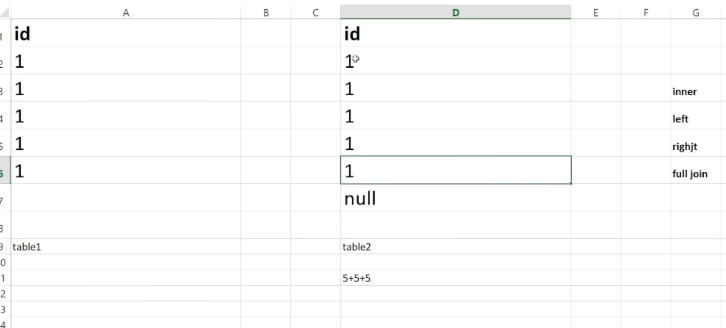

In [ ]:
---join related que

create table table1  (id int) 
Insert into table1 values(1),(1),(1),(1),(1)

create table table2 (id int)
Insert into table2 values(1),(1),(1),(1),(1),(null)


select * from table1
select * from table2

--query1. how many rows will you get when you will perform inner join 
-- 25
select * from table1 join table2 on table1.id=table2.id

--query1. how many rows will you get when you will perform left join 
-- 25
select * from table1 left join table2 on table1.id=table2.id

--query1. how many rows will you get when you will perform right join 
--26
select * from table1 right join table2 on table1.id=table2.id
--query1. how many rows will you get when you will perform full join 
-- 26
select * from table1 full join table2 on table1.id=table2.id

-- after insertig null
insert into table1 values(null)

-- inner - 25
-- left - 26
-- right -26
-- full - 26


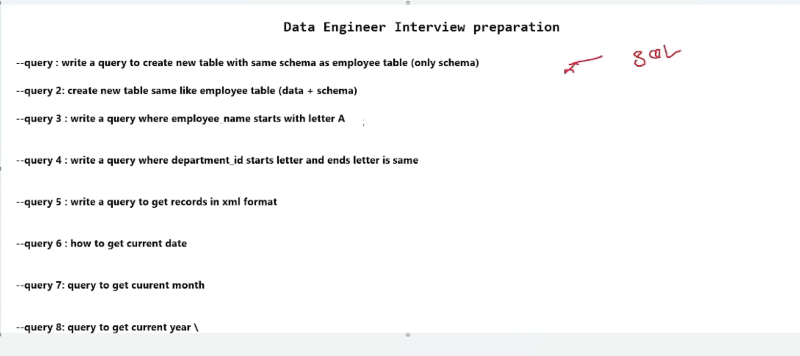

In [ ]:
-- query to create new table with same schema as empl table
select * into table3 from employee where 1=2;

-- create new table like employee table(data + schema)
select * into table4 from employee where 1=1;

--query where employee namme starts with a
select * from employee where name like 'a%'

--query where dept id starts with same letter and ends with same letter
select * from employee where left(department_id,1)=RIGHT(department_id,1);

-- query to get records in xml format
select * from employee for xml AUTO;

-- get current date
select getdate();
select current_timestamp;

--get current month
select month(getdate())

-- get current year
select year(getdate())



# next set of questions

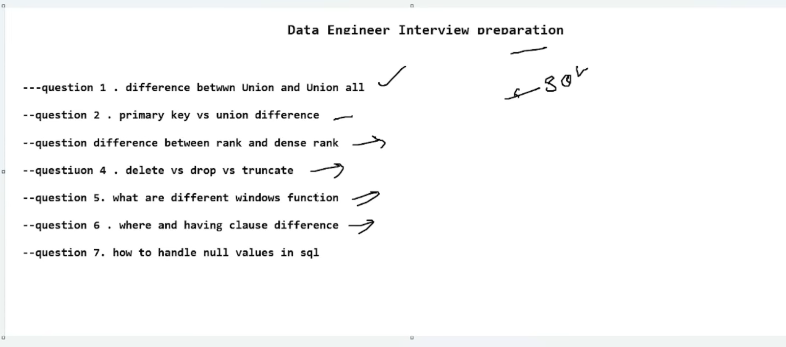

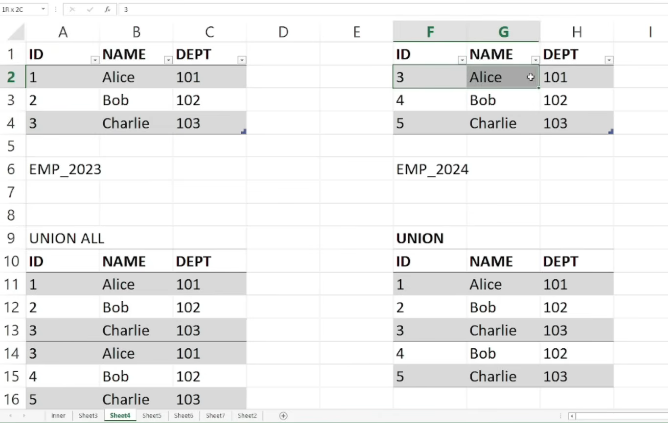

In [1]:

-- question 1. difference between union and union alll
UNION: Combines the results of two queries and removes duplicate rows
UNION ALL: Combines the results of two queries without removing duplicate.

-- question 2. primary key vs union differnece
primary key - used to serve as a unique identifier for each row in a table
cannot accept NULL values
only one primary key

UNIQUE KEY- Uniquely determines a row tht isn't' the primary key
can accept NULL values
More than one unique key

--rank vs dense rank
rank(): skips ranks if there are ties
dense_rank(): does not skips, even if there are ties

rank    dense_rank()    salary
1       1               100000
2       2               70000
2       2               70000
4       3               50000

-- delete vs drop vs truncate
    - DELETE: This command is used to remove specific rows from a table based on a condition. It can be rolled back if within a transaction.
    - TRUNCATE: This command removes all rows from a table, but it does not log individual row deletions. It is faster than DELETE for large tables and cannot be rolled back in most databases.
    - DROP: This command removes the entire table structure along with all its data from the database. It cannot be rolled back.


-- different windows functions
windows fns perfom calculations across a set of table rows related to the current row.

example include:
row_number()
rank()
dense_rank()
avg() over()

-- where and having clause difference.
where : filters rows before grouping (group by)
having: filters groups created by group by

-- how to handle null values in sql
use functions like
is null or is not null to filter records.
coalesce(column, default_value) to replace NULL with a default value


SyntaxError: invalid syntax (3971340006.py, line 1)

# important interview Qs

In [2]:

---important employee manager related sql question 

CREATE TABLE Emp4 (
    EmpID INT PRIMARY KEY,
    EmpName VARCHAR(50),
    ManagerID INT,
    Department VARCHAR(50)
);

INSERT INTO Emp4 (EmpID, EmpName, ManagerID, Department)
VALUES 
    (1, 'John', NULL, 'HR'),        -- John is the top-level manager
    (2, 'Alice', 1, 'Finance'),    -- Alice reports to John
    (3, 'Bob', 1, 'IT'),           -- Bob reports to John
    (4, 'Charlie', 2, 'Finance'),  -- Charlie reports to Alice
    (5, 'Eve', 3, 'IT');         

select * from emp4
-- Find out the employees manager details from employee table
select a.EmpName,b.EmpName as Manager_name from emp4 a 
left join emp4 b on a.ManagerID=b.EmpID;

-- find cumulative sum of salary

select * from employee;

select *,sum(salary) over(order by id) as rn from employee; 

SyntaxError: invalid syntax (1178797438.py, line 1)